In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6



In [2]:
dataset = pd.read_csv("cache_data.csv")
dataset.head()

,Time,Cache_id
0,2020-05-22 05:55:46.378307,2
1,2020-05-22 05:58:46.378307,16
2,2020-05-22 06:01:46.378307,2
3,2020-05-22 06:04:46.378307,20
4,2020-05-22 06:07:46.378307,2


In [3]:
# Parse strings to datetime type

dataset['Time'] = pd.to_datetime(dataset['Time'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Time']) 
indexedDataset.head(5)


,Cache_id
Time,
2020-05-22 05:55:46.378307,2
2020-05-22 05:58:46.378307,16
2020-05-22 06:01:46.378307,2
2020-05-22 06:04:46.378307,20
2020-05-22 06:07:46.378307,2


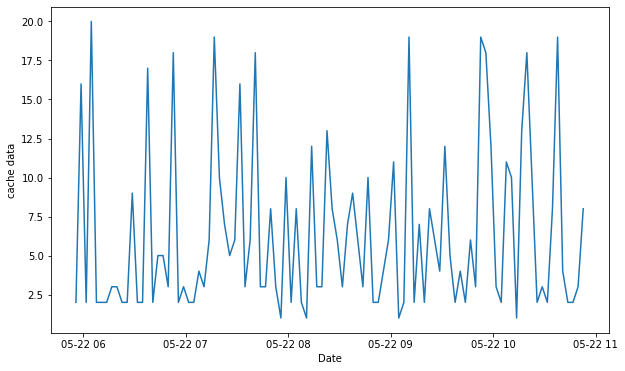

In [4]:

## plot graph

plt.xlabel("Date")
plt.ylabel("cache data")
plt.plot(indexedDataset[:100])

In [5]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=20).mean()

rolstd = indexedDataset.rolling(window=20).std()
print(rolmean, rolstd)




                            Cache_id
Time                                
2020-05-22 05:55:46.378307       NaN
2020-05-22 05:58:46.378307       NaN
2020-05-22 06:01:46.378307       NaN
2020-05-22 06:04:46.378307       NaN
2020-05-22 06:07:46.378307       NaN
...                              ...
2020-05-26 09:40:46.378307      4.95
2020-05-26 09:43:46.378307      4.25
2020-05-26 09:46:46.378307      4.10
2020-05-26 09:49:46.378307      4.30
2020-05-26 09:52:46.378307      4.25

[2000 rows x 1 columns]                             Cache_id
Time                                
2020-05-22 05:55:46.378307       NaN
2020-05-22 05:58:46.378307       NaN
2020-05-22 06:01:46.378307       NaN
2020-05-22 06:04:46.378307       NaN
2020-05-22 06:07:46.378307       NaN
...                              ...
2020-05-26 09:40:46.378307  5.020746
2020-05-26 09:43:46.378307  4.327087
2020-05-26 09:46:46.378307  4.351648
2020-05-26 09:49:46.378307  4.390180
2020-05-26 09:52:46.378307  4.423323

[2000 rows x

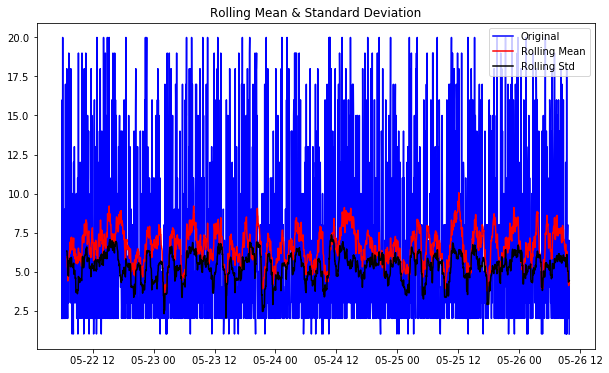

In [6]:

#PLot rolling statistics: 
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')

plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [7]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Cache_id'], autolag='AIC')

   
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used' ])
for key,value in dftest[4].items():
    dfoutput[ 'Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -33.222153
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1998.000000
Critical Value (1%)              -3.433627
Critical Value (5%)              -2.862988
Critical Value (10%)             -2.567541
dtype: float64


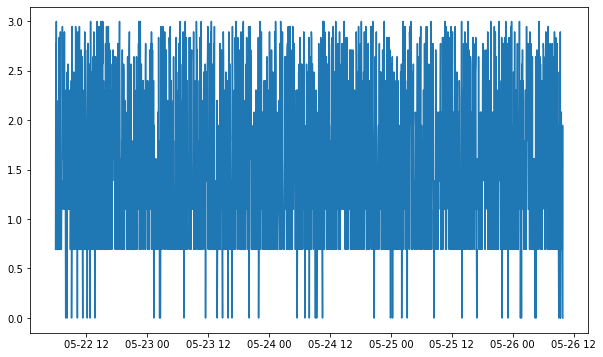

In [8]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

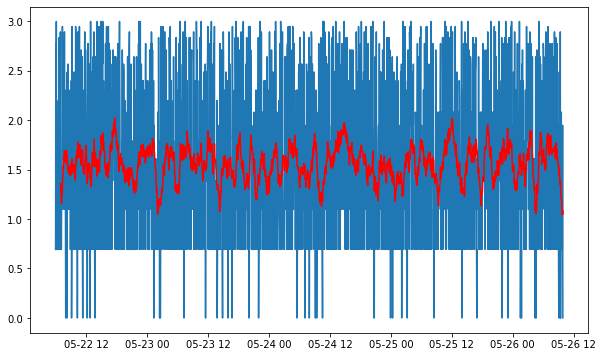

In [9]:
movingAverage = indexedDataset_logScale.rolling(window=20).mean()
movingSTD = indexedDataset_logScale.rolling(window=20).std()
plt.plot(indexedDataset_logScale)

plt.plot(movingAverage, color="red")


In [10]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(20)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Cache_id
Time,
2020-05-22 06:52:46.378307,1.533606
2020-05-22 06:55:46.378307,-0.663619
2020-05-22 06:58:46.378307,-0.174455
2020-05-22 07:01:46.378307,-0.579920
2020-05-22 07:04:46.378307,-0.464791
2020-05-22 07:07:46.378307,0.193699
2020-05-22 07:10:46.378307,-0.114256
2020-05-22 07:13:46.378307,0.523961
2020-05-22 07:16:46.378307,1.584349


In [11]:
from statsmodels.tsa.stattools import adfuller
from numpy import inf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=20).mean()
    movingSTD = timeseries.rolling(window=20).std()
    
    #Plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    timeseries[timeseries == -inf] = 0
    dftest = adfuller(timeseries['Cache_id'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used' ])
    for key,value in dftest[4].items():
        dfoutput[ 'Critical Value (%s)'%key] = value
    print(dfoutput)



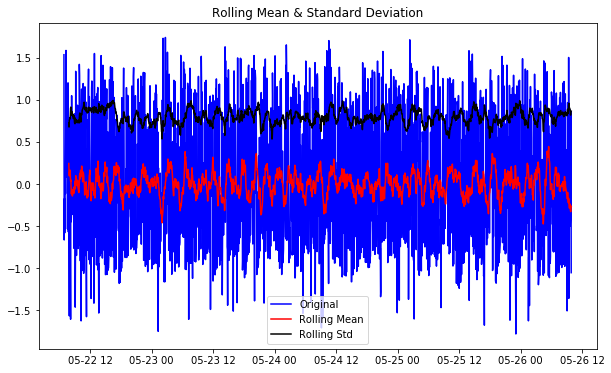

Results of Dickey-Fuller Test:
Test Statistic                -1.391280e+01
p-value                        5.471533e-26
#Lags Used                     1.800000e+01
Number of Observations Used    1.962000e+03
Critical Value (1%)           -3.433687e+00
Critical Value (5%)           -2.863014e+00
Critical Value (10%)          -2.567555e+00
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

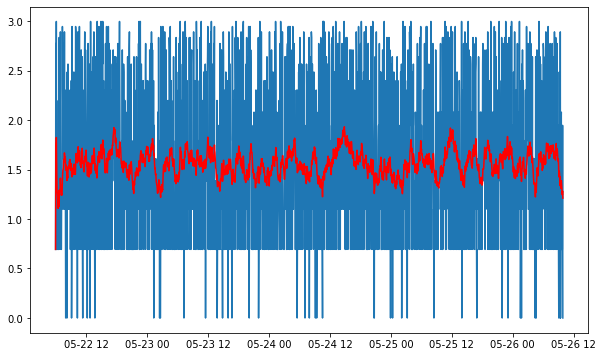

In [13]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


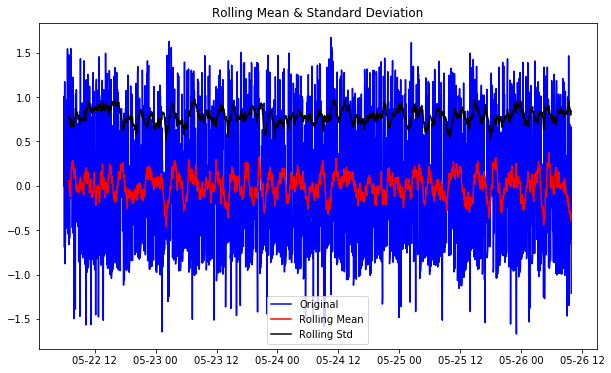

Results of Dickey-Fuller Test:
Test Statistic                  -28.564258
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1997.000000
Critical Value (1%)              -3.433629
Critical Value (5%)              -2.862988
Critical Value (10%)             -2.567541
dtype: float64


In [14]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
datasetLogScaleMinusMovingExponentialDecayAverage.dropna(inplace=False)
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)


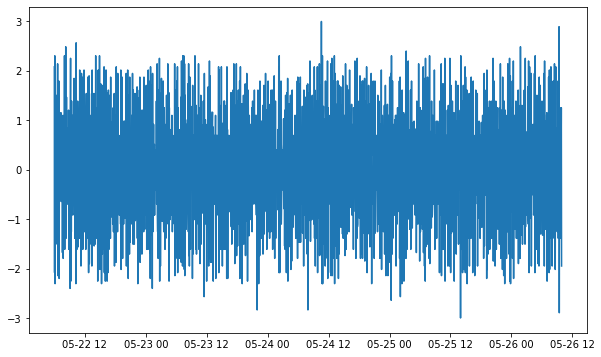

In [15]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

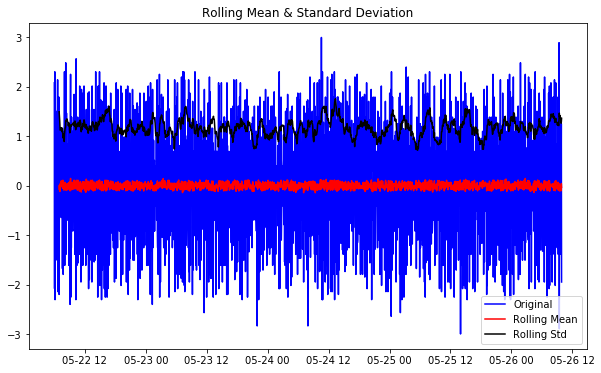

Results of Dickey-Fuller Test:
Test Statistic                -1.477855e+01
p-value                        2.264210e-27
#Lags Used                     2.500000e+01
Number of Observations Used    1.973000e+03
Critical Value (1%)           -3.433669e+00
Critical Value (5%)           -2.863006e+00
Critical Value (10%)          -2.567550e+00
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
datasetLogDiffShifting[datasetLogDiffShifting == inf] = 0
test_stationarity(datasetLogDiffShifting)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  import sys


AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

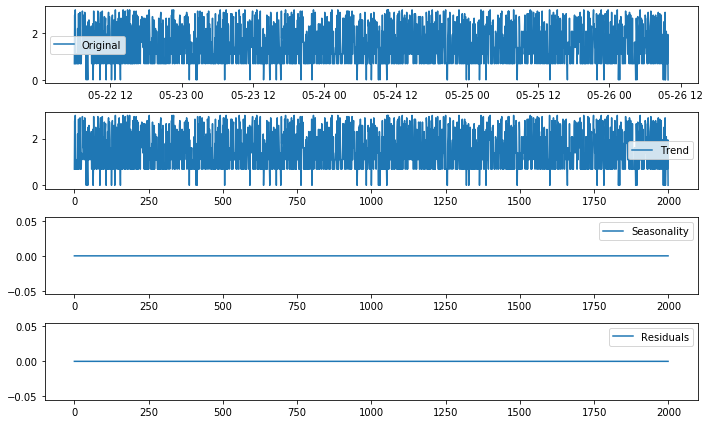

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import inf
indexedDataset_logScale.dropna()
indexedDataset_logScale[indexedDataset_logScale == -inf] = 0
indexedDataset_logScale[indexedDataset_logScale == inf] = 0
#decomposition = seasonal_decompose(indexedDataset_logScale.Cache_id.value)
decomposition = seasonal_decompose(indexedDataset_logScale.Cache_id.values, freq=1)
#res=seasonal_decompose(data2.Content.values, freq=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot (seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot (414)

plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
#decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


In [ ]:
decomposedLogData = residual
print(decomposedLogData[-50:])
#decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )


C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


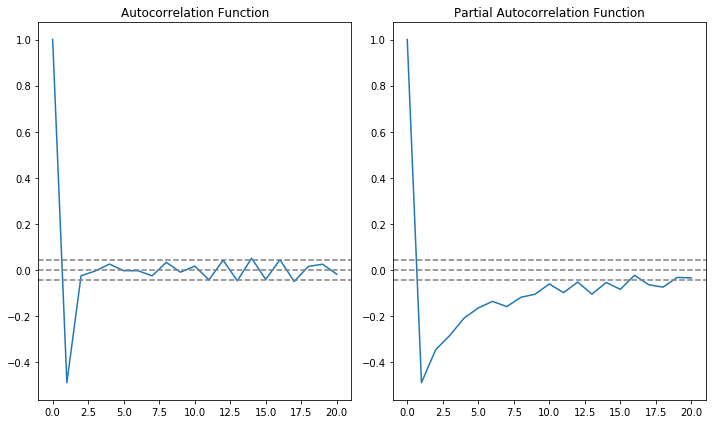

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#PLot ACF:
plt.subplot (121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting) ),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting) ),linestyle='--',color='gray')
plt.title( 'Autocorrelation Function')

#PLot PACF: 
plt.subplot (122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting) ),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting) ),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()


C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3T will be used.
  % freq, ValueWarning)
C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3T will be used.
  % freq, ValueWarning)


Plotting AR model


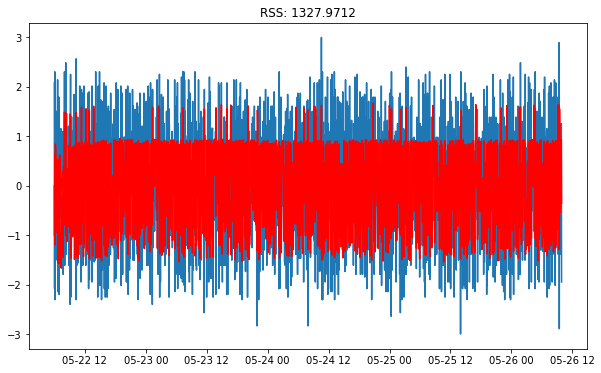

In [24]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL

model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))

results_AR = model.fit(disp=-1)

plt.plot(datasetLogDiffShifting)

plt.plot(results_AR.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Cache_id'])**2))
print('Plotting AR model')


C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3T will be used.
  % freq, ValueWarning)
C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3T will be used.
  % freq, ValueWarning)


Plotting AR model


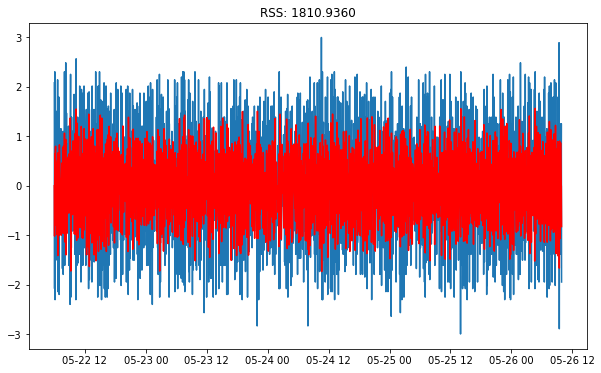

In [25]:
#MA MODEL

model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))

results_MA = model. fit(disp=-1)

plt.plot (datasetLogDiffShifting)

plt.plot(results_MA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Cache_id'])**2))
print('Plotting AR model')


C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3T will be used.
  % freq, ValueWarning)
C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3T will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1327.9712')

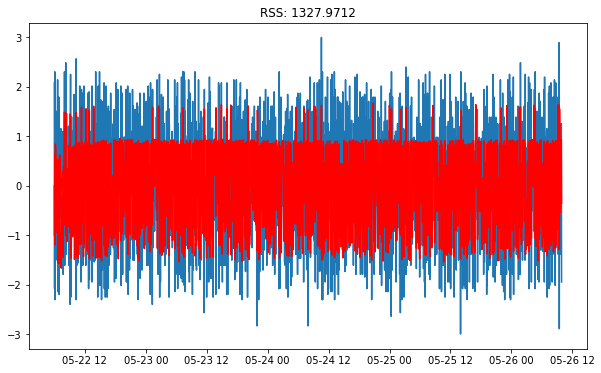

In [26]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))

results_ARIMA = model.fit(disp=-1)

plt.plot(datasetLogDiffShifting)

plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Cache_id'])**2))




In [27]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Time
2020-05-22 05:58:46.378307    0.000002
2020-05-22 06:01:46.378307   -1.017407
2020-05-22 06:04:46.378307    0.643277
2020-05-22 06:07:46.378307   -1.193598
2020-05-22 06:10:46.378307    0.840726
dtype: float64


In [28]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


Time
2020-05-22 05:58:46.378307    0.000002
2020-05-22 06:01:46.378307   -1.017405
2020-05-22 06:04:46.378307   -0.374128
2020-05-22 06:07:46.378307   -1.567726
2020-05-22 06:10:46.378307   -0.727000
dtype: float64


In [29]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Cache_id'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()


Time
2020-05-22 05:55:46.378307    0.693147
2020-05-22 05:58:46.378307    2.772591
2020-05-22 06:01:46.378307   -0.324258
2020-05-22 06:04:46.378307    2.621604
2020-05-22 06:07:46.378307   -0.874579
dtype: float64

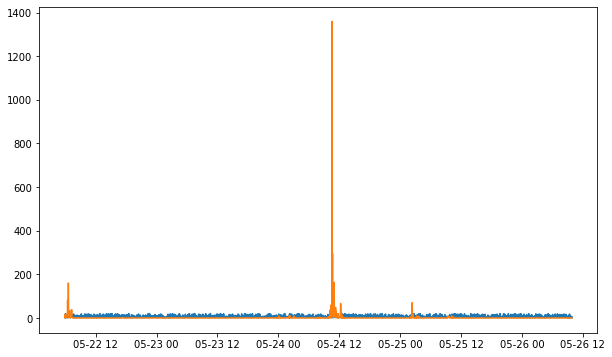

In [30]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)


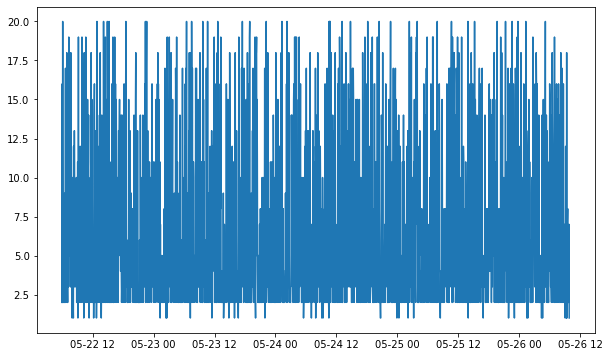

In [31]:
plt.plot(indexedDataset)

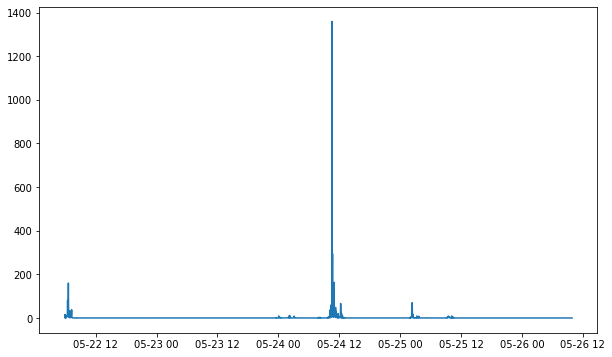

In [32]:
plt.plot(predictions_ARIMA)

In [33]:
indexedDataset_logScale

,Cache_id
Time,
2020-05-22 05:55:46.378307,0.693147
2020-05-22 05:58:46.378307,2.772589
2020-05-22 06:01:46.378307,0.693147
2020-05-22 06:04:46.378307,2.995732
2020-05-22 06:07:46.378307,0.693147
...,...
2020-05-26 09:40:46.378307,0.693147
2020-05-26 09:43:46.378307,0.693147
2020-05-26 09:46:46.378307,0.693147


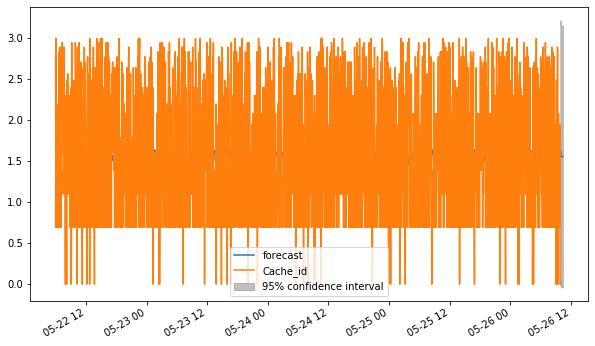

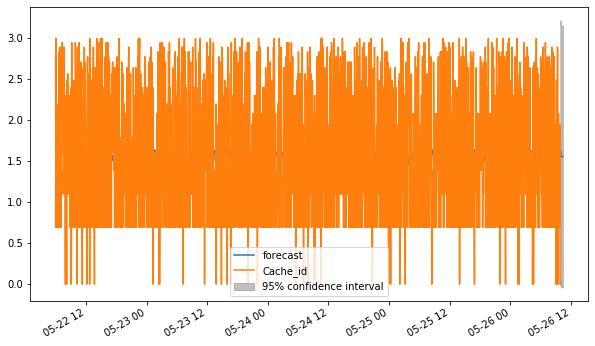

In [34]:
results_ARIMA.plot_predict(1,2010)

In [36]:
results_ARIMA.forecast(steps=10)

(array([1.58498632, 1.62340772, 1.56766828, 1.55596956, 1.55604208,
        1.55652052, 1.55660699, 1.55660582, 1.55660415, 1.55660587]),
 array([0.8127732 , 0.8129879 , 0.81376658, 0.81378695, 0.81378703,
        0.81378708, 0.81378708, 0.81378708, 0.81378708, 0.81378708]),
 array([[-0.00801988,  3.17799252],
        [ 0.02998072,  3.21683471],
        [-0.02728491,  3.16262148],
        [-0.03902355,  3.15096267],
        [-0.03895118,  3.15103535],
        [-0.03847285,  3.15151389],
        [-0.03838638,  3.15160037],
        [-0.03838756,  3.15159919],
        [-0.03838922,  3.15159753],
        [-0.03838751,  3.15159924]]))